In [40]:
import torch as t
import torch.nn as nn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


THE VAR OF PPH IS 0.29% from monthly % change
THE VAR OF PPH IS 0.29% from monthly % change
THE VAR OF PPH IS 0.29% from monthly % change
THE VAR OF PPH IS 0.29% from monthly % change


c:\Users\fafcr\Desktop\PytorchLearning\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


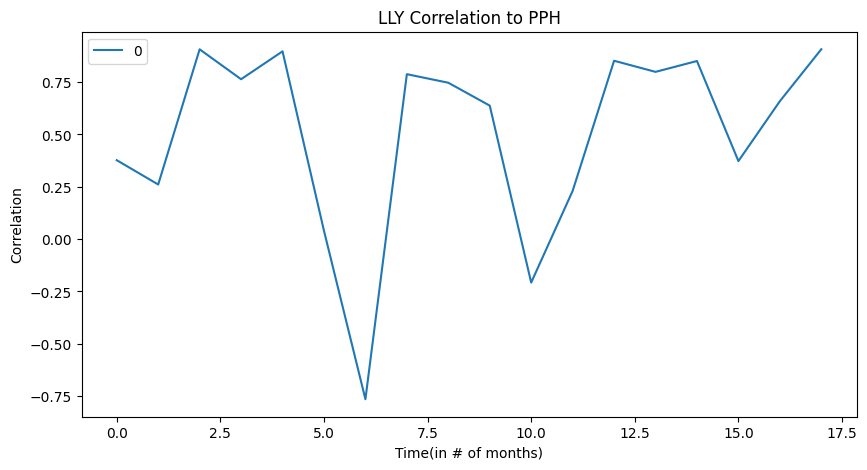

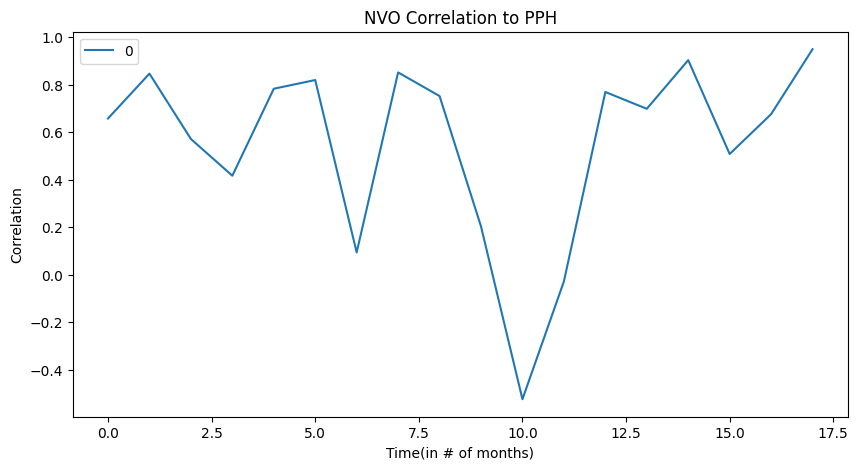

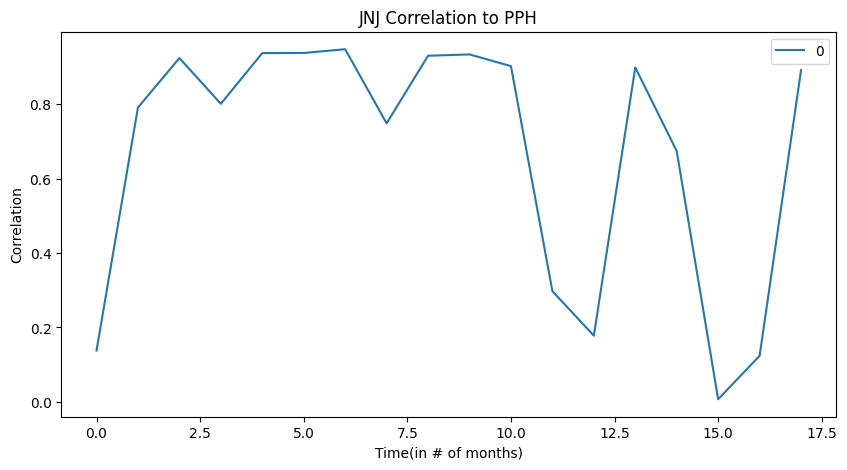

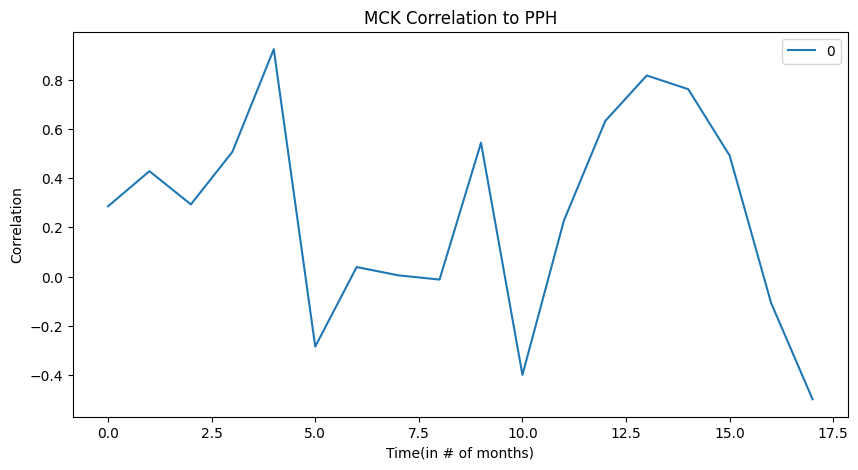

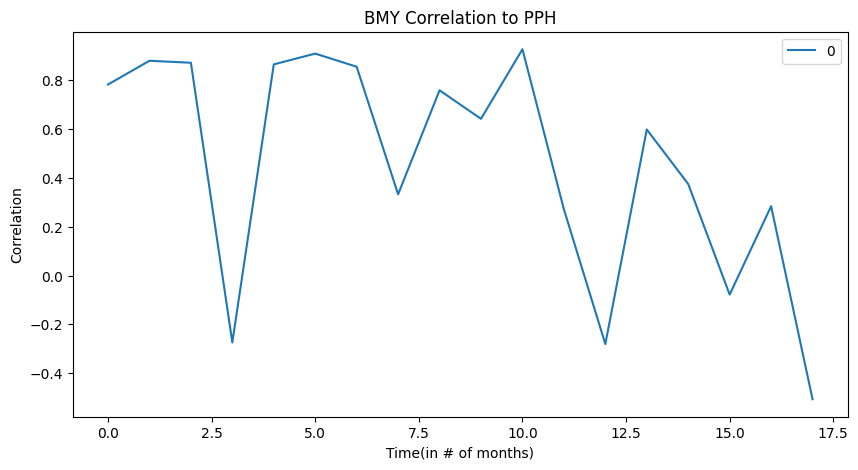

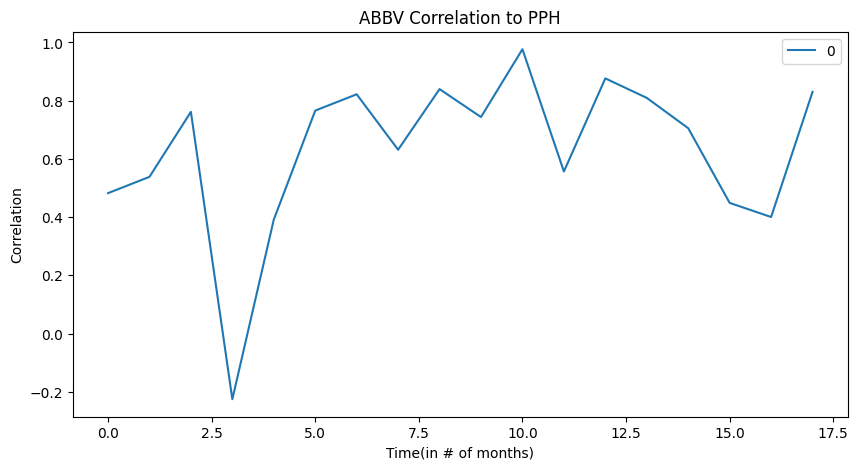

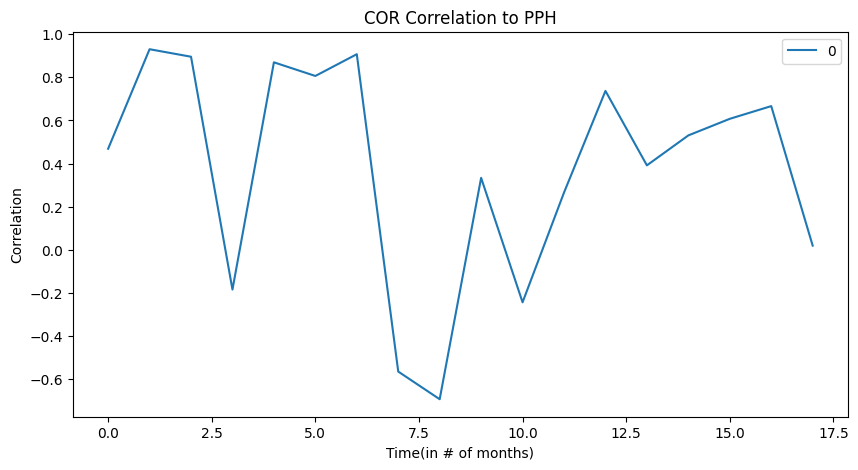

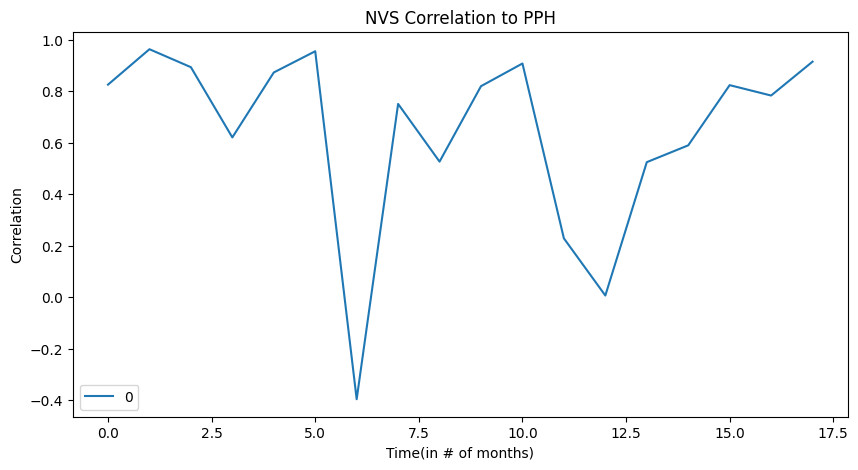

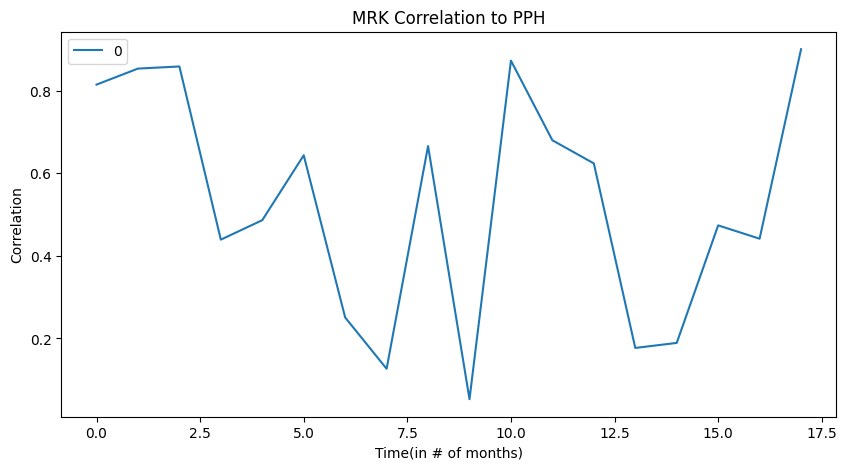

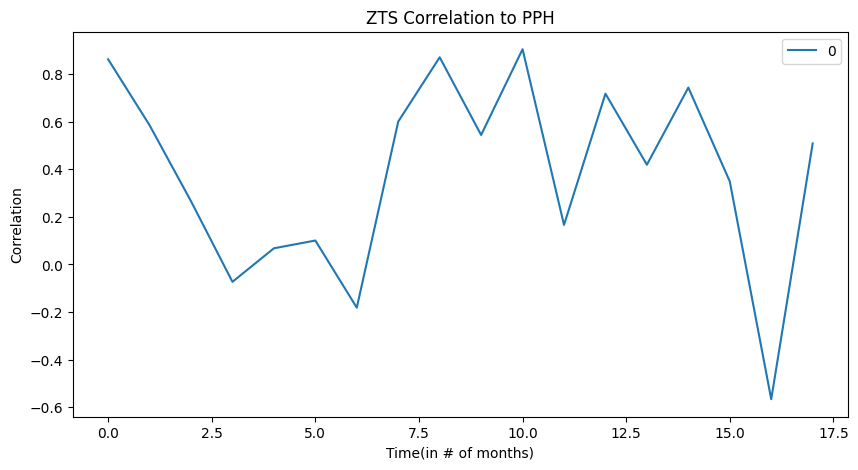

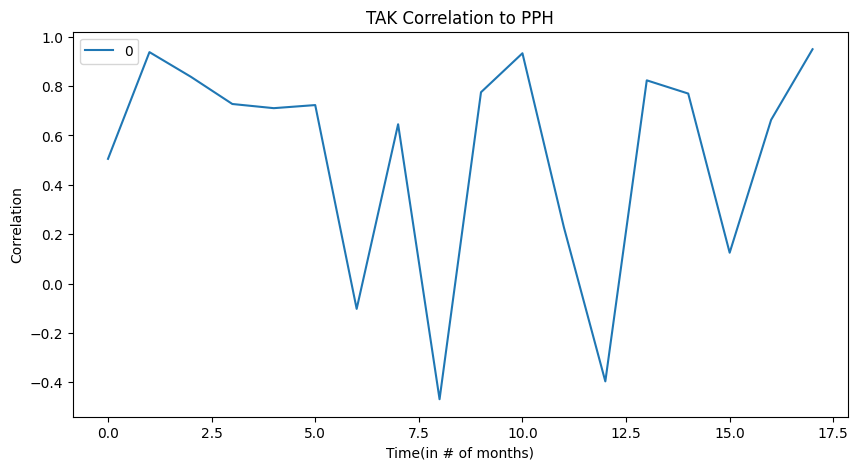

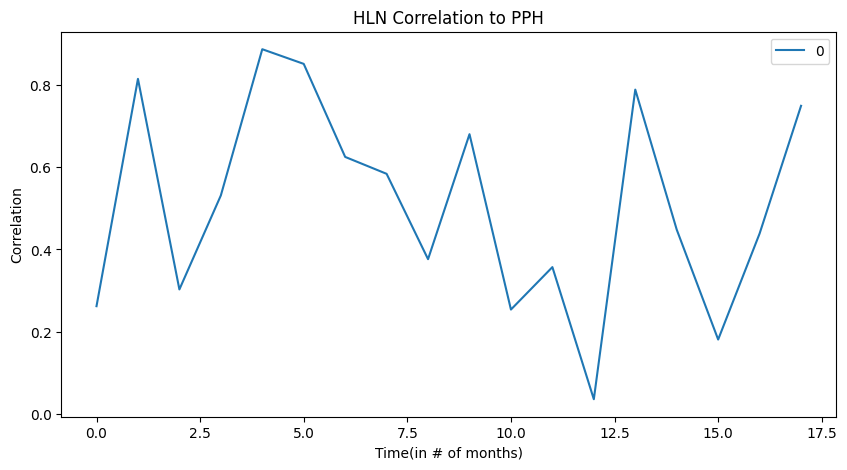

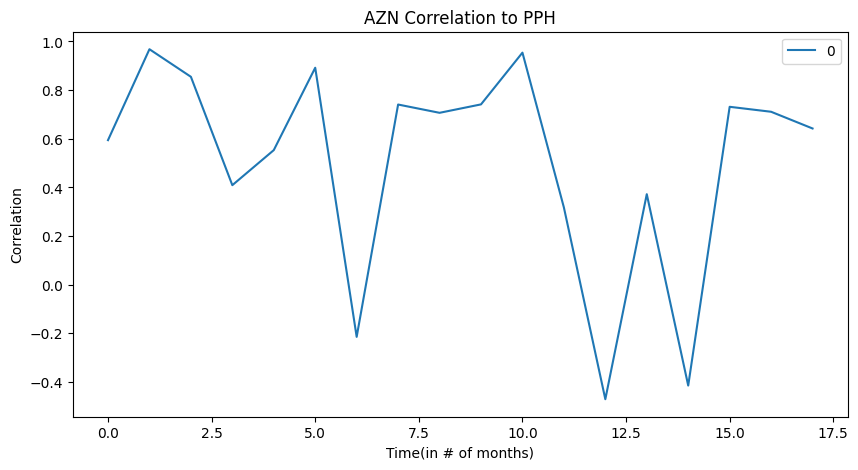

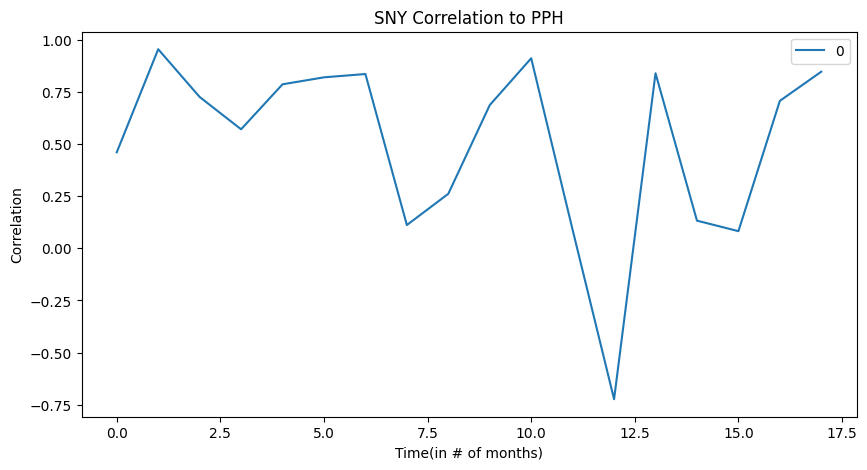

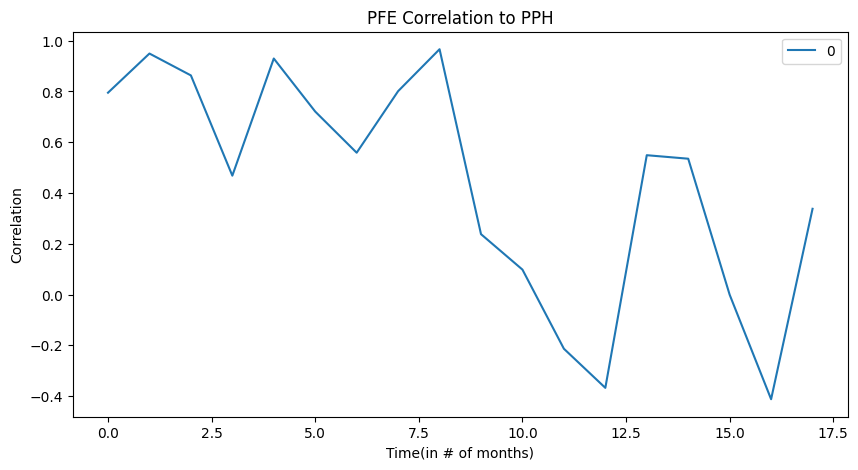

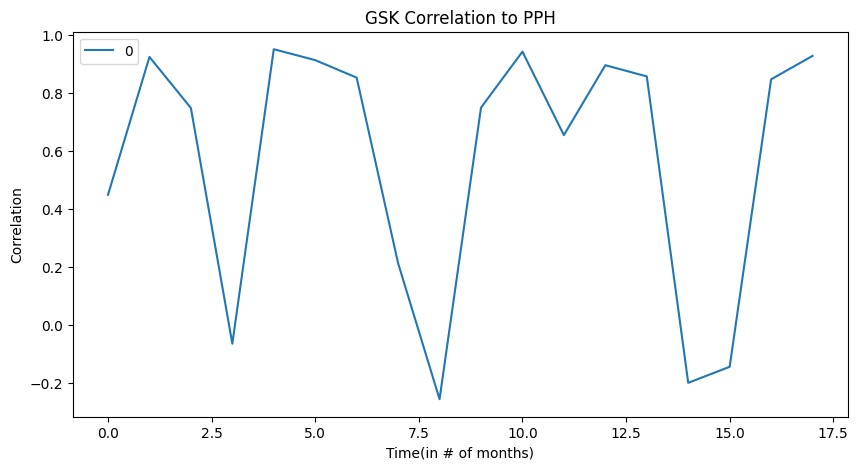

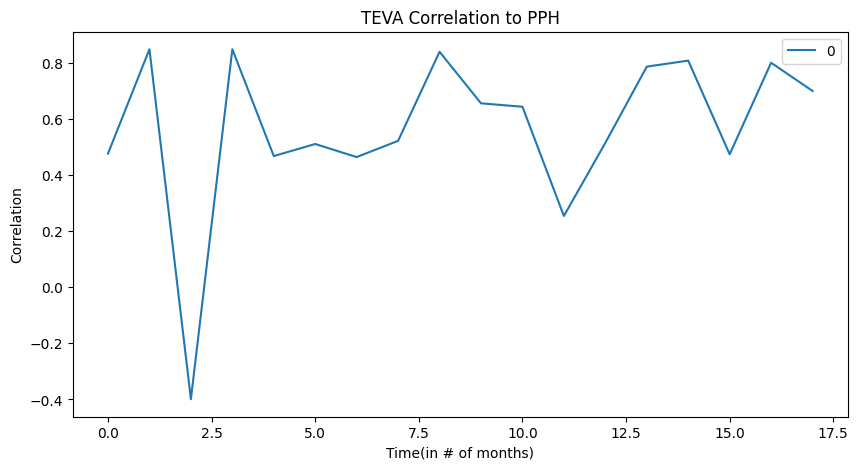

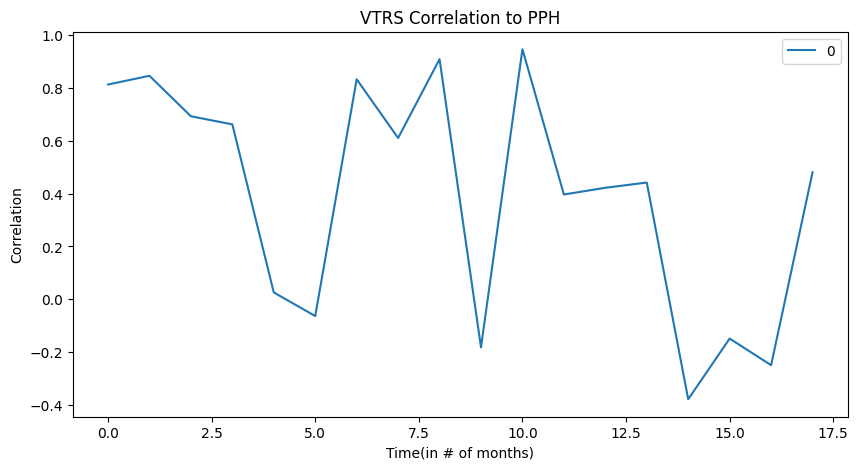

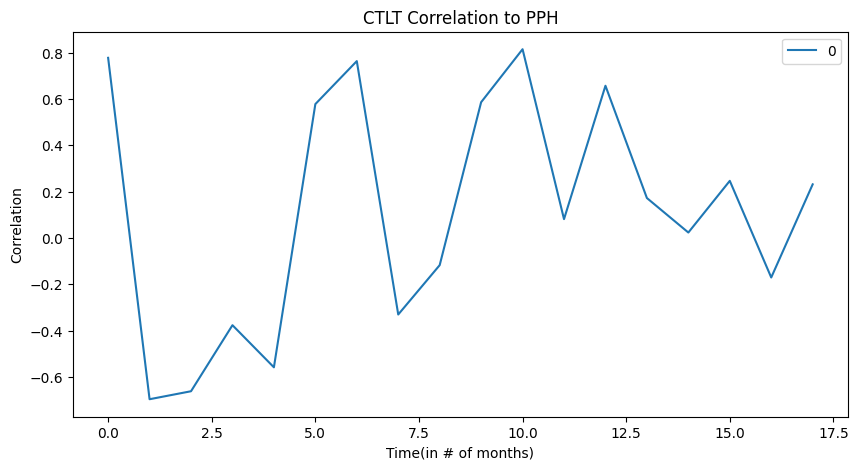

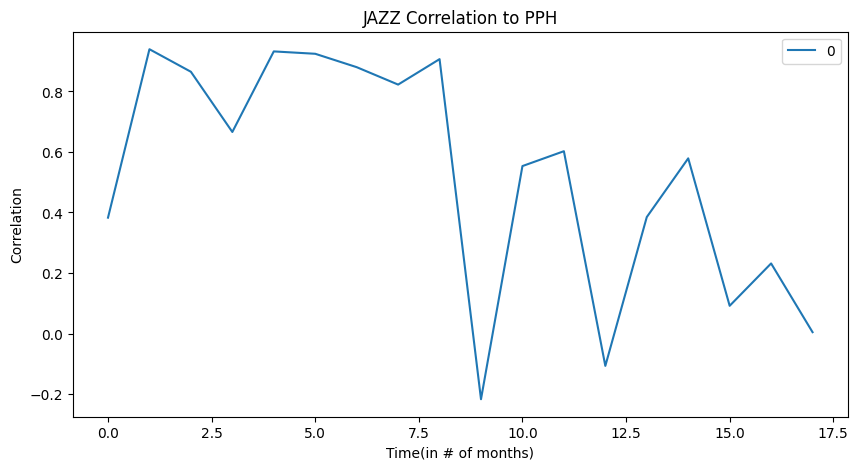

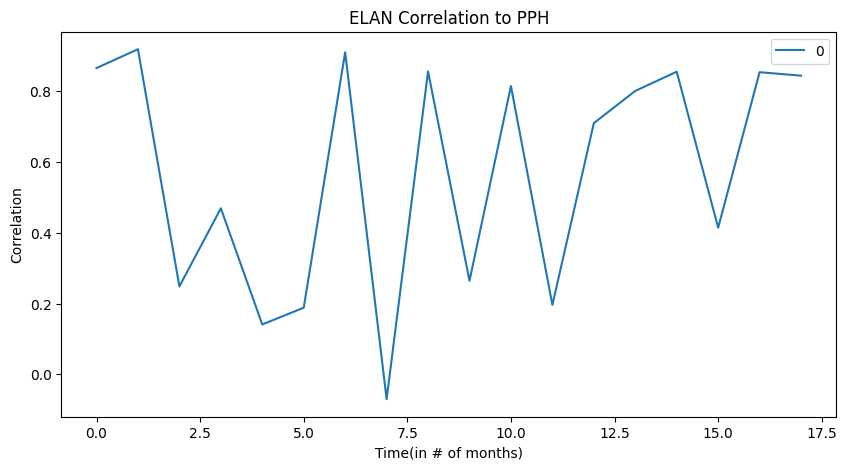

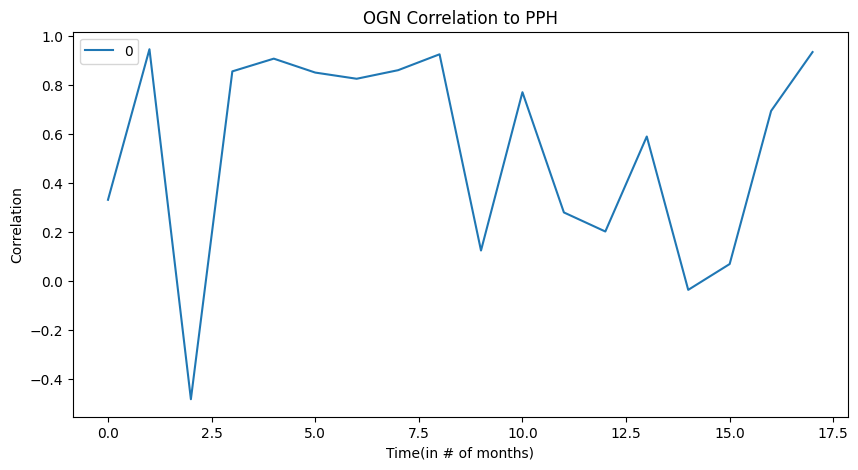

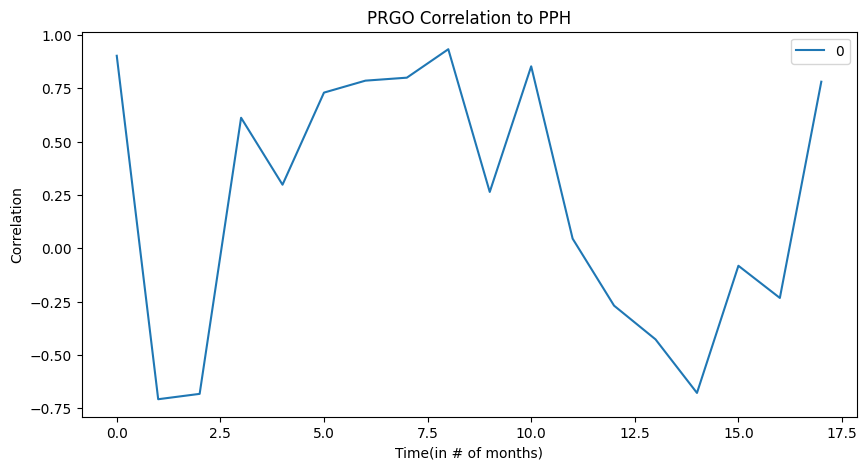

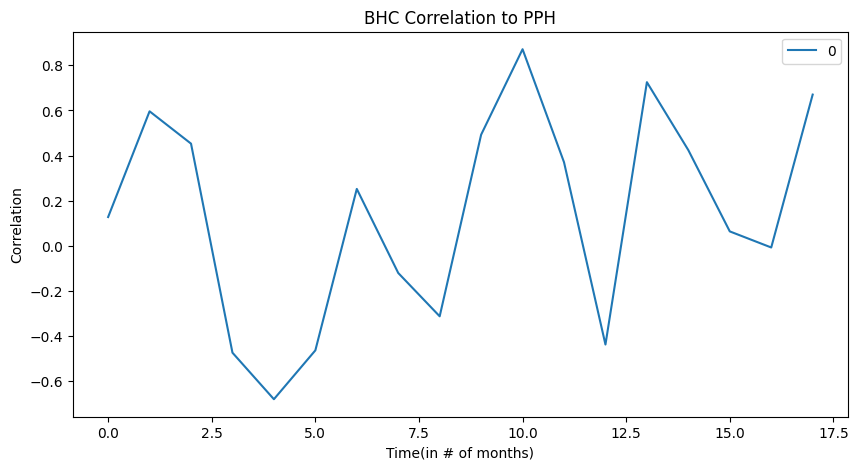

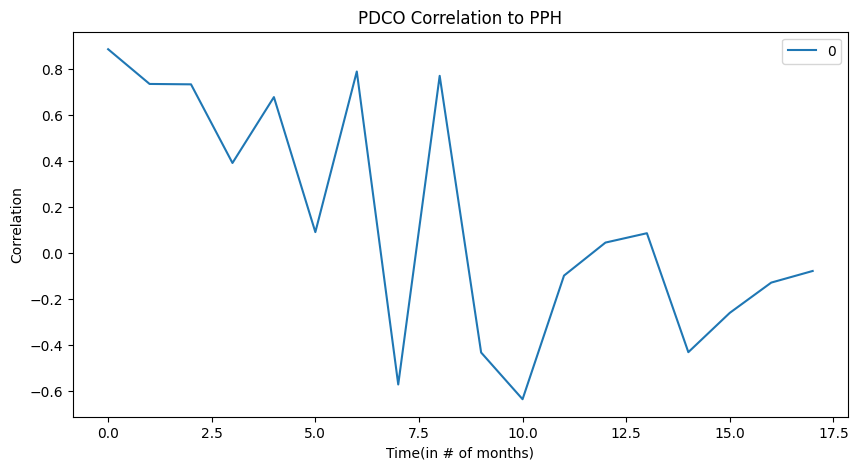

In [106]:
#takes data of which stocks r in the pph etf, turns it into a list to iterate over
tickerdf = pd.read_csv('pph list of tickers.csv')
tickerdf = tickerdf['Unnamed: 1']
tickerdf.dropna(inplace=True)
tickerlist = tickerdf.tolist()[1:26]
price_info = pd.DataFrame()

for i in range(len(tickerlist)):
    tickerlist[i] = tickerlist[i][:-3]

for i in tickerlist:
    tempdf = yf.Ticker(f"{i}").history(period="max")['Close'].pct_change(30)
    price_info[i] = tempdf

#cleans price_info
price_info['PPH'] = yf.Ticker('PPH').history(period="max")['Close'].pct_change(30)
for i in range(4):
    print(F'THE VAR OF PPH IS {100*price_info['PPH'].var():.2f}% from monthly % change')
price_info.dropna(inplace=True)

# print(price_info)
#sets up the big correlation matrix to be plotted
df = price_info
bigger_corr = np.array([])
dict_of_corr = {}
for ticker in tickerlist:
    dict_of_corr[ticker] = np.array([])
for i in range(0, len(df)-30, 30):
    big_corr = np.array([])
    tempdf = df[i:i+30]
    correlation_matrix = np.array(tempdf.corr())
    correlation_matrix = correlation_matrix[-1][:-1]
    for ticker in range(len(tickerlist)):
        dict_of_corr[tickerlist[ticker]] = np.append(dict_of_corr[tickerlist[ticker]],correlation_matrix[ticker])

for ticker in dict_of_corr:
    df = pd.DataFrame(dict_of_corr[ticker])
    df.plot(figsize=(10,5),title=f'{ticker} Correlation to PPH',ylabel='Correlation',xlabel='Time(in # of months)')


    
    



                                pph       pfe
Date                                         
2022-09-06 00:00:00-04:00       NaN       NaN
2022-09-07 00:00:00-04:00       NaN       NaN
2022-09-08 00:00:00-04:00       NaN       NaN
2022-09-09 00:00:00-04:00       NaN       NaN
2022-09-12 00:00:00-04:00       NaN       NaN
...                             ...       ...
2024-11-13 00:00:00-05:00 -0.048288 -0.088949
2024-11-14 00:00:00-05:00 -0.054579 -0.112156
2024-11-15 00:00:00-05:00 -0.073012 -0.157496
2024-11-18 00:00:00-05:00 -0.071107 -0.189220
2024-11-19 00:00:00-05:00 -0.070511 -0.200041

[556 rows x 2 columns]


<Axes: >

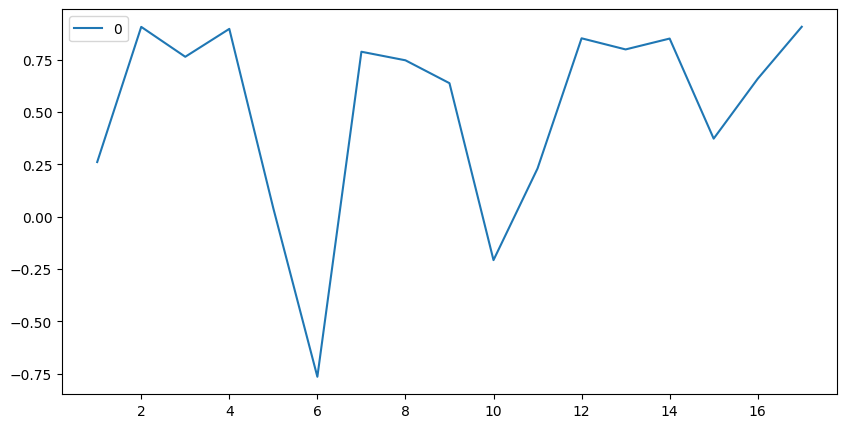

In [104]:
pph = yf.Ticker("PPH").history(start="2022-09-06")
pfe = yf.Ticker("lly").history(start="2022-09-06")
df = pd.DataFrame()
df['pph'] = pph['Close'].pct_change(30)
df['pfe'] = pfe['Close'].pct_change(30)

print(df)
# correlation_matrix = df.corr()
bigger_corr = np.array([])
for i in range(0, len(df)-30,30):
    spliced_df = df[i:i+30]
    correlation_matrix = np.array(spliced_df.corr())
    spliced_df.corr().to_csv(f'{i}test.csv')
    bigger_corr = np.append(bigger_corr,correlation_matrix[0][1])

bigger_corr = pd.DataFrame(bigger_corr)
bigger_corr.plot(figsize=(10,5))





<Axes: >

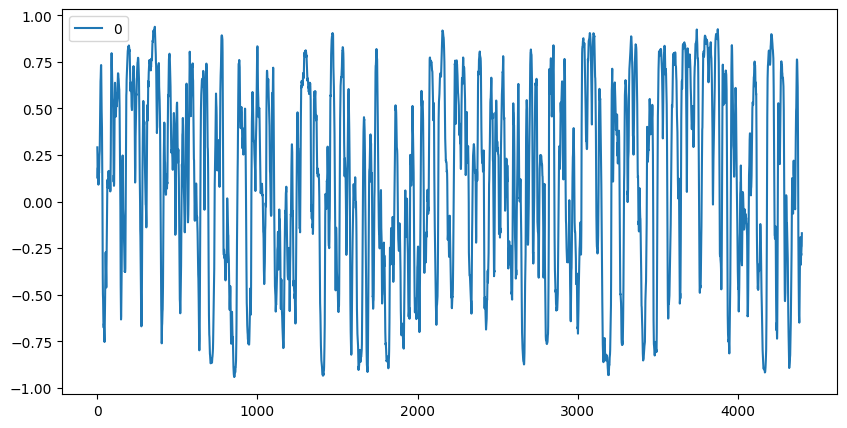

In [38]:
ung = yf.Ticker("UNG").history(period="max")
enb = yf.Ticker("enb").history(period="max")
df = pd.DataFrame()
df['ung'] = ung['Close']
df['enb'] = enb['Close']

# correlation_matrix = df.corr()
bigger_corr = np.array([])
for i in range(0, len(df)-30):
    spliced_df = df[i:i+30]
    correlation_matrix = np.array(spliced_df.corr())
    bigger_corr = np.append(bigger_corr,correlation_matrix[0][1])

bigger_corr = pd.DataFrame(bigger_corr)
bigger_corr.plot(figsize=(10,5))


<Axes: >

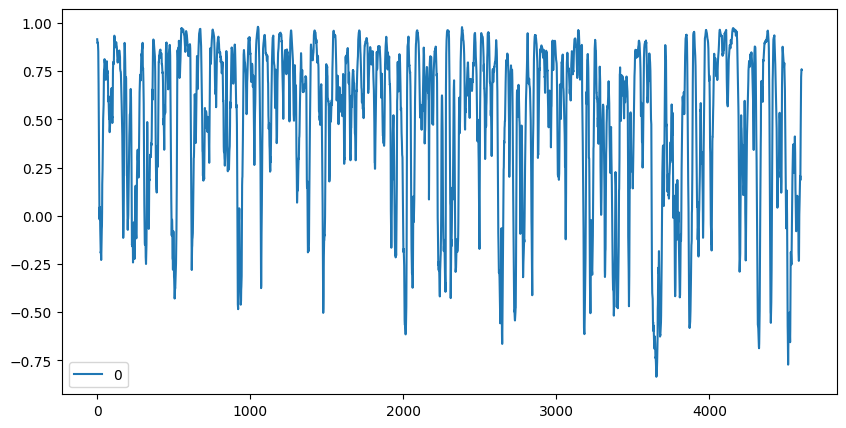

In [37]:
xrt = yf.Ticker("XRT").history(period="max")
cost = yf.Ticker("COST").history(period="max")
df = pd.DataFrame()
df['xrt'] = xrt['Close']
df['cost'] = cost['Close']

# correlation_matrix = df.corr()
bigger_corr = np.array([])
for i in range(0, len(df)- 30):
    spliced_df = df[i:i+30]
    correlation_matrix = np.array(spliced_df.corr())
    bigger_corr = np.append(bigger_corr,correlation_matrix[0][1])

bigger_corr = pd.DataFrame(bigger_corr)
bigger_corr.plot(figsize=(10,5))